<a href="https://colab.research.google.com/github/Crispyjones7387/COVID19-Analysis/blob/master/XRAY%20Analysis%20using%20VGG19/COVID19_XRay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Apr  1 11:05:36 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [43]:
!wget -P /content/XRays https://codeload.github.com/matheusAltomare/covid19XRayClassification/zip/master

--2020-04-01 11:33:35--  https://codeload.github.com/matheusAltomare/covid19XRayClassification/zip/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.9
Connecting to codeload.github.com (codeload.github.com)|140.82.112.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/XRays/master’

master                  [        <=>         ]  35.76M  21.0MB/s    in 1.7s    

2020-04-01 11:33:37 (21.0 MB/s) - ‘/content/XRays/master’ saved [37494967]



In [51]:
!unzip /content/XRays/master.zip -d /content/XRays/COVID19

Archive:  /content/XRays/master.zip
5d48a5e3a836be42ec0db72d09df7fc94d4edaa9
   creating: /content/XRays/COVID19/covid19XRayClassification-master/
   creating: /content/XRays/COVID19/covid19XRayClassification-master/.ipynb_checkpoints/
  inflating: /content/XRays/COVID19/covid19XRayClassification-master/.ipynb_checkpoints/VGG19-checkpoint.ipynb  
  inflating: /content/XRays/COVID19/covid19XRayClassification-master/README.md  
  inflating: /content/XRays/COVID19/covid19XRayClassification-master/VGG19.ipynb  
   creating: /content/XRays/COVID19/covid19XRayClassification-master/dataset/
   creating: /content/XRays/COVID19/covid19XRayClassification-master/dataset/covid-19/
  inflating: /content/XRays/COVID19/covid19XRayClassification-master/dataset/covid-19/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: /content/XRays/COVID19/covid19XRayClassification-master/dataset/covid-19/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: /content/XRays/COVID19/covid19XRayClassification-maste

In [59]:
import shutil

shutil.move('/content/XRays/COVID19/dataset/', '/content/XRays/',copy_function = shutil.copytree) 

'/content/XRays/dataset'

In [0]:
 shutil.rmtree('/content/XRays/COVID19')

In [0]:
from PIL import Image
from os import listdir
from os.path import isdir
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

**LOAD IMAGES**

In [0]:
def select_image(filename):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    image = image.resize((150,150))
    # convert to array
    return np.asarray(image)

**LOAD CLASSES FROM IMAGES**

In [0]:
def load_classes(directory, classs, images, labels):
    #file iterations

    for filename in listdir(directory):
        path = directory + filename
        try:
            images.append(select_image(path))
            labels.append(classs)
        except:

            print("Error loading image {}".format(path))
    return images, labels

**SELECTING DATASET**

In [0]:
def select_data_set(directory):

    images = list()
    labels = list()

    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'

        if not isdir(path):
            continue
        images, labels = load_classes(path, subdir, images, labels)

    return images, labels

In [83]:
covid_dataset = "/content/XRays/dataset/"
images, labels  = select_data_set(covid_dataset)
images = np.array(images) / 255.0  ## convertendo de lista para array
labels = np.array(labels)  ## convertendo de lista para array
labels

array(['normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'normal', 'normal',
       'normal', 'normal', 'normal', 'normal', 'pneumonia', 'pneumonia',
       'pneumonia', 'pneumonia', 'pneumonia', 'pneumonia', 'pneumonia',
       'pneumonia', 'pneumonia', 'pneumonia', 'pneumonia', 'pneumonia',
       'pneumonia', 'pneumonia', 'pneumonia', 'pneumonia', 'pneumonia',
       'pneumonia', 'pneumonia', 'pneumon

In [84]:
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)
labels

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1

**DEFINE HYPERPARAMETERS**

In [0]:
batch_size   = 32
input_shape  = (150, 150, 3)
random_state = 42
alpha        = 1e-5
epoch        = 100

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [0]:
filepath="transferlearning_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_delta=alpha, patience=5, verbose=1)
callbacks = [checkpoint, lr_reduce]

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=random_state)

**AUGUMENT DATA**

In [0]:
train_datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.2)

train_datagen.fit(trainX)

data_aug = train_datagen.flow(trainX, trainY, batch_size=batch_size)

*https://keras.io/applications/#vgg19*

In [93]:
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=input_shape)

conv_base.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 0s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128

*EXTRA PART OF VGG19*



In [94]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

conv_base.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

**CREATING A MODEL**

In [0]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(3, activation='softmax'))

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               65664     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

***COMPILE***

In [0]:
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])

**TRAIN THE MODEL**

In [98]:
history = model.fit_generator(
                              data_aug,
                              steps_per_epoch=len(trainX)// batch_size, # parte inteira da divisão
                              validation_data=(testX, testY),
                              validation_steps=len(testX) // batch_size,# parte inteira da divisão
                              callbacks=callbacks,
                              epochs=epoch)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
4/4 [==============================] - ETA: 0s - loss: 0.6318 - acc: 0.7292
Epoch 00001: val_acc improved from -inf to 0.55556, saving model to transferlearning_weights.hdf5
4/4 [==============================] - 2s 392ms/step - loss: 0.6318 - acc: 0.7292 - val_loss: 1.8545 - val_acc: 0.5556 - lr: 0.0010
Epoch 2/100
4/4 [==============================] - ETA: 0s - loss: 0.3789 - acc: 0.8512
Epoch 00002: val_acc did not improve from 0.55556
4/4 [==============================] - 1s 157ms/step - loss: 0.3788 - acc: 0.8512 - val_loss: 7.0067 - val_acc: 0.5556 - lr: 0.0010
Epoch 3/100
4/4 [==============================] - ETA: 0s - loss: 0.3696 - acc: 0.8402
Epoch 00003: val_acc improved from 0.55556 to 0.69231, saving model to transferlearning_weights.hdf5
4/4 [==============================] - 1s 208ms/step - loss: 0.3694 - acc: 0.8402 - val_loss: 1.4559 - val_acc: 0.6923 - lr: 0.0010
Epoch 4/100
4/4

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
%matplotlib inline

**ANALYZE THE RESULTS**

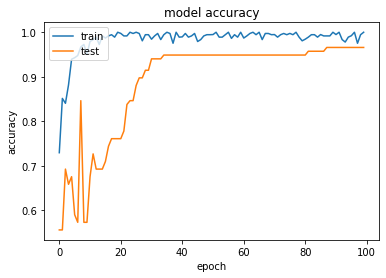

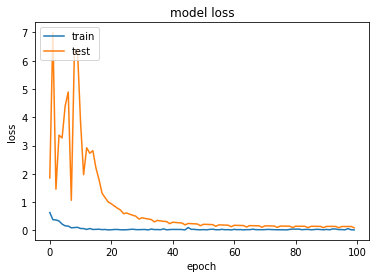

In [100]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
pred = model.predict(testX)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(testY,axis = 1)

Accuracy: 0.9487
Sensitivity: 0.8462
Specificity: 1.0000


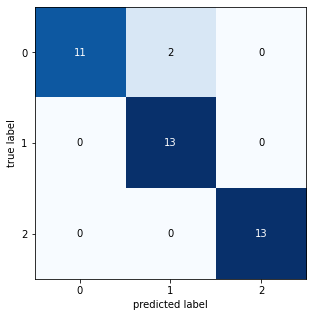

In [104]:
cm = confusion_matrix(y_true, pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("Accuracy: {:.4f}".format(acc))
print("Sensitivity: {:.4f}".format(sensitivity))
print("Specificity: {:.4f}".format(specificity))

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()